# Analysis Hotels Reviews in Europe (EDA)

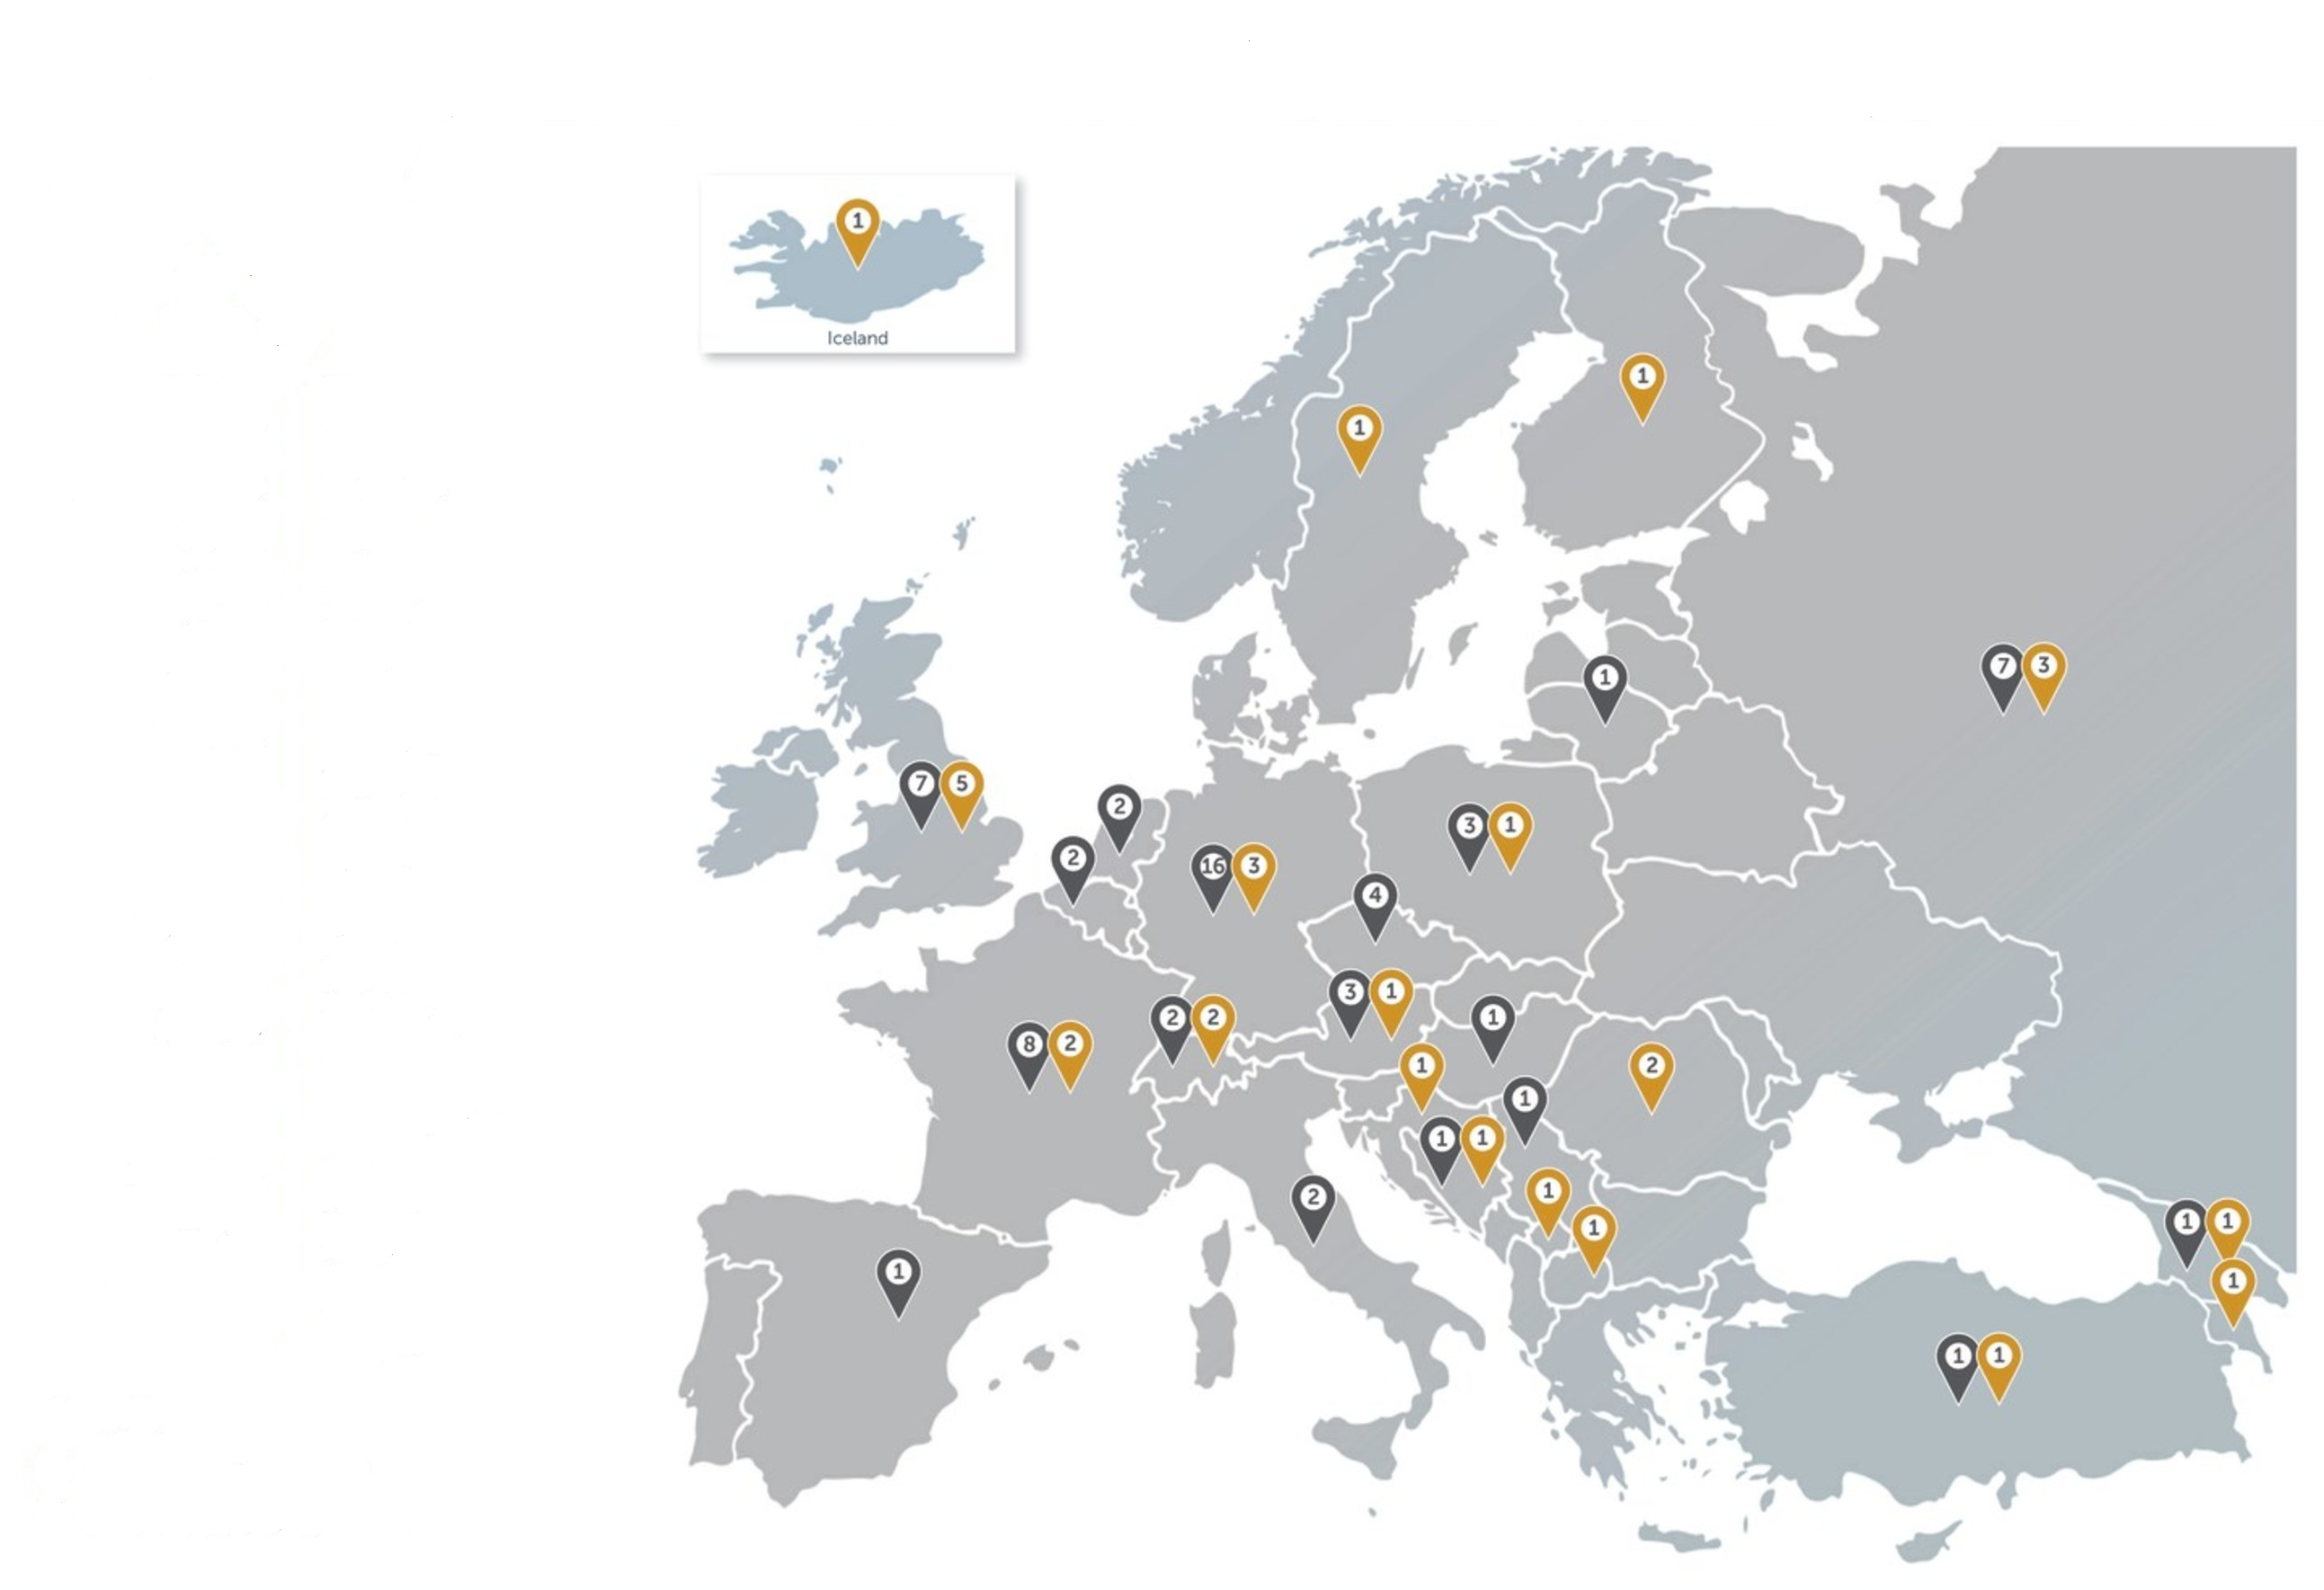

In [49]:
from IPython.display import Image
Image(filename='EUROP.png')

## Table of Content:

>1. [Imports Libraries](#Imports_Libraries)
>2. [Load Data](#Load_Data)
>3. [checking the missing value](#checking_the_missing_value)
>4. [Checking for Null Values](#Checking_for_Null_Values)
>5. [Exploratory Data Analysis](#Exploratory_Data_Analysis)
>6. [the Average rating of all hotels](#the_Average_rating_of_all_hotels)
>7. [Distribution of reviews to highly rated hotels](#Distribution_of_reviews_to_highly_rated_hotels)
>8. [Rating of the worst hotels and Why did it get this rating](#Rating_of_the_worst_hotels_and_Why_did_it_get_this_rating)
>9. [Unique value](#Unique_value)
>10. [Drop the Duplicated Rows](#Drop_the_Duplicated_Rows)

# [Imports Libraries](#Imports_Libraries)

In [8]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [9]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Pallets used for visualizations
from matplotlib.colors import ListedColormap
color= "Spectral"
color_sns= sns.color_palette(color)
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'

In [10]:
from wordcloud import WordCloud

# [Load Data](#Load_Data)

In [11]:
df_Hotel = pd.read_csv('dataset/Hotel_Reviews.csv')

In [12]:
df_Hotel.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [13]:
df_Hotel.tail()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677
515737,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/9/2015,8.1,Atlantis Hotel Vienna,Hungary,I was in 3rd floor It didn t work Free Wife,13,2823,staff was very kind,6,1,8.3,"[' Leisure trip ', ' Family with young childre...",725 day,48.203745,16.335677


# [checking the missing value](#checking_the_missing_value)

Text(0.5, 1.0, 'Main Data Frame')

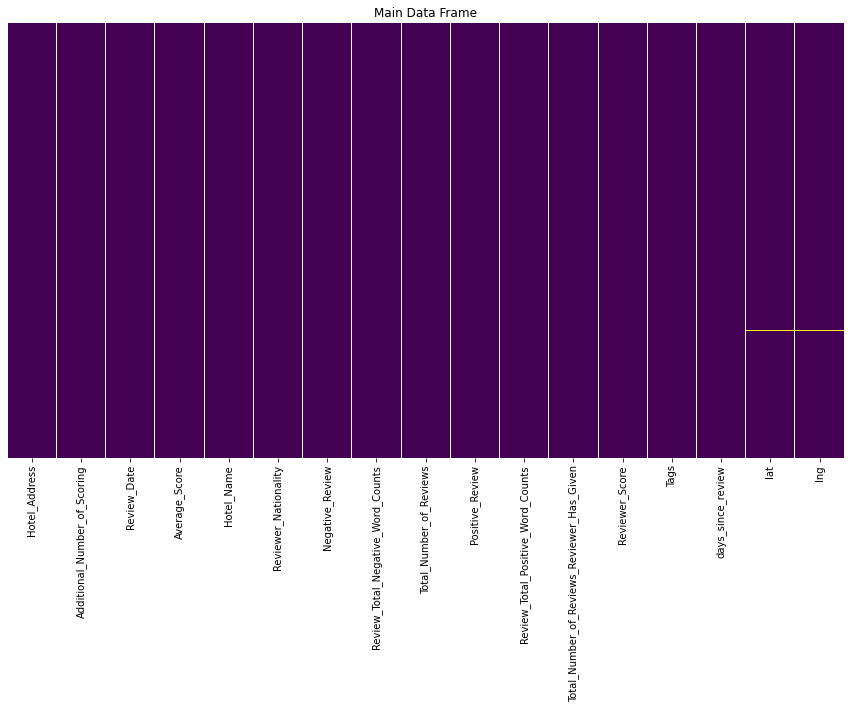

In [18]:
# checking the missing value & test dataset
fig, ax = plt.subplots( figsize = (15, 8))

# data 
sns.heatmap(df_Hotel.isnull(), yticklabels=False, cbar=False, cmap='viridis')
ax.set_title('Main Data Frame')

In [19]:
#Finding missing data and the percentage of it in each column
total = df_Hotel.isnull().sum().sort_values(ascending = False)
percent = (df_Hotel.isnull().sum() / df_Hotel.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data

,Total_NaN,Percent_Nan
lng,3268,0.006337
lat,3268,0.006337
Review_Total_Negative_Word_Counts,0,0.000000
Additional_Number_of_Scoring,0,0.000000
Review_Date,0,0.000000
Average_Score,0,0.000000
Hotel_Name,0,0.000000
Reviewer_Nationality,0,0.000000
Negative_Review,0,0.000000
Total_Number_of_Reviews,0,0.000000


In [20]:
df_Hotel.shape

(515738, 17)

In [21]:
df_Hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [22]:
df_Hotel['Review_Date'] = pd.to_datetime(df_Hotel['Review_Date'])

In [23]:
df_Hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               515738 non-null  object        
 1   Additional_Number_of_Scoring                515738 non-null  int64         
 2   Review_Date                                 515738 non-null  datetime64[ns]
 3   Average_Score                               515738 non-null  float64       
 4   Hotel_Name                                  515738 non-null  object        
 5   Reviewer_Nationality                        515738 non-null  object        
 6   Negative_Review                             515738 non-null  object        
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64         
 8   Total_Number_of_Reviews                     515738 non-null  int64        

In [24]:
df_Hotel.describe()#print concise summery of the dataset

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [25]:
# df_Hotel.value_counts()

In [26]:
df_Hotel.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [27]:
df_Hotel.dtypes

Hotel_Address                                         object
Additional_Number_of_Scoring                           int64
Review_Date                                   datetime64[ns]
Average_Score                                        float64
Hotel_Name                                            object
Reviewer_Nationality                                  object
Negative_Review                                       object
Review_Total_Negative_Word_Counts                      int64
Total_Number_of_Reviews                                int64
Positive_Review                                       object
Review_Total_Positive_Word_Counts                      int64
Total_Number_of_Reviews_Reviewer_Has_Given             int64
Reviewer_Score                                       float64
Tags                                                  object
days_since_review                                     object
lat                                                  float64
lng                     

# [Checking for Null Values](#Checking_for_Null_Values)

In [28]:
df_Hotel.isnull().sum()#Checking for Null Values

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [29]:
df_Hotel.drop(['lat','lng'], axis=1, inplace=True)#drop 2 columns (lat & lng)

In [30]:
df_Hotel.isnull().sum()#Checking for Null Values

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
dtype: int64

In [31]:
df_Hotel.shape

(515738, 15)

In [32]:
df_Hotel.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review'],
      dtype='object')

# [Exploratory Data Analysis](#Exploratory_Data_Analysis)

###### HISTOGRAM

A **histogram** is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where **X-axis** represents the bin ranges while **Y-axis** gives information about frequency.



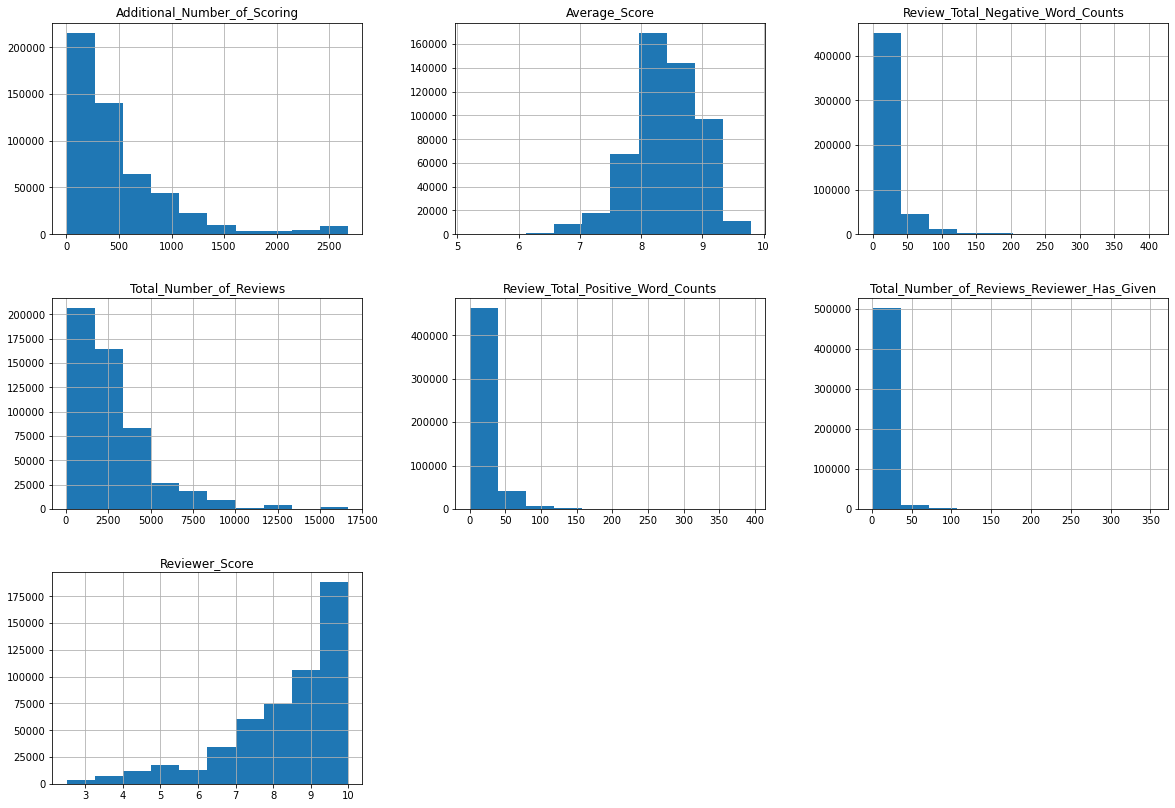

In [33]:
df_Hotel.hist(figsize=(20,14))
plt.show()

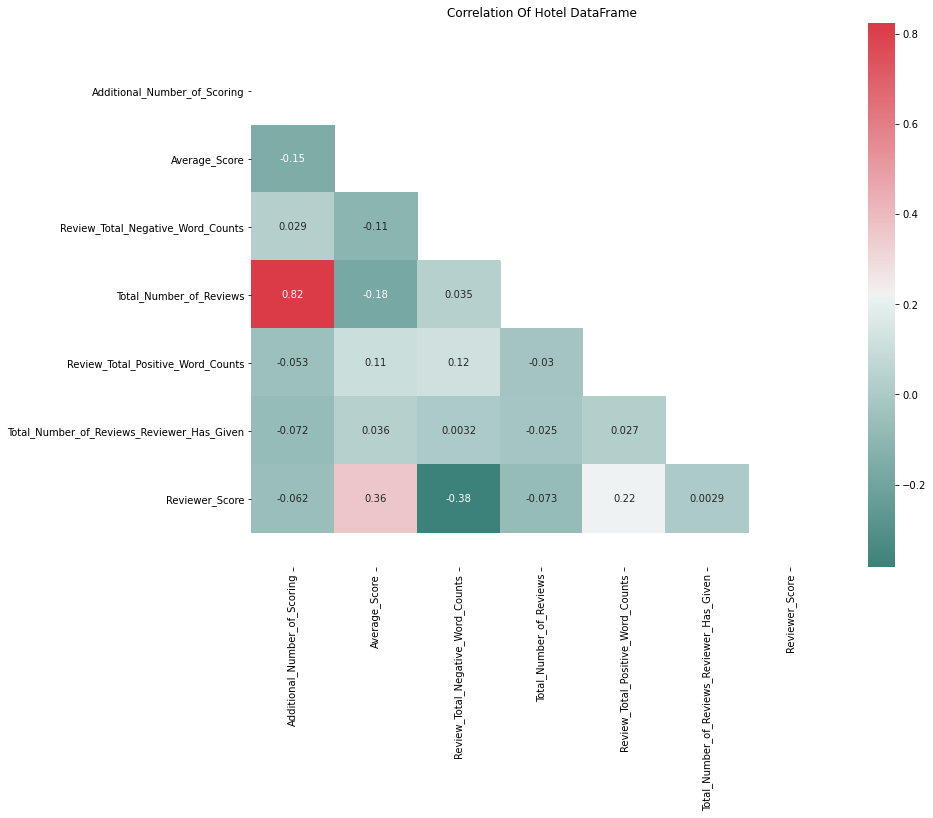

In [34]:
fig, axs = plt.subplots(figsize = (13, 10)) 
# no_id_vis_df= visual_df.drop('PassengerId',axis=1 )
mask = np.triu(np.ones_like(df_Hotel.corr(), dtype = np.bool))
sns.heatmap(df_Hotel.corr(), ax = axs, annot = True, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation Of Hotel DataFrame')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [35]:
# a function that takes a dataframe and transforms it into a standard form after dropping nun_numirical columns
def to_standard (df_Hotel):
    
    num_df = df_Hotel[df_Hotel.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index = num_df.index, columns = num_df.columns)
    return std_df

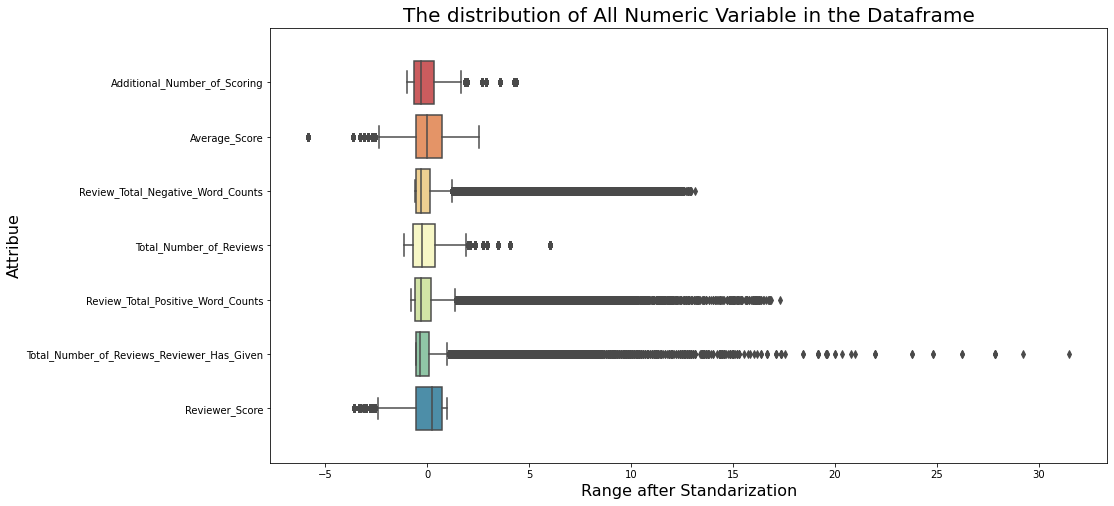

In [36]:
ax, fig = plt.subplots(1, 1, figsize = (15, 8))
plt.title('The distribution of All Numeric Variable in the Dataframe', fontsize = 20) #Change please

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(df_Hotel)), palette = 'Spectral')
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Attribue', size = 16)


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [37]:
df_Hotel['Hotel_Name'].value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Boundary Rooms Suites                                  12
Le Lavoisier                                           12
Mercure Paris Porte d Orleans                          10
Hotel Wagner                                           10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

# [the Average rating of all hotels](#the_Average_rating_of_all_hotels)

In [38]:
## AVERAGE SCORE FOR EACH HOTEL

df_Hotel[['Hotel_Name', 'Reviewer_Score']].groupby(['Hotel_Name'], as_index=False).mean().sort_values(by='Reviewer_Score', ascending=False)

,Hotel_Name,Reviewer_Score
1202,Ritz Paris,9.725000
598,Hotel Casa Camper,9.718937
3,41,9.711650
472,H tel de La Tamise Esprit de France,9.688525
895,Le Narcisse Blanc Spa,9.671930
...,...,...
546,Holiday Inn Paris Montparnasse Pasteur,6.329730
1233,Savoy Hotel Amsterdam,6.009465
1455,Villa Eugenie,5.864516
852,Kube Hotel Ice Bar,5.852632


# [Distribution of reviews to highly rated hotels](#Distribution_of_reviews_to_highly_rated_hotels)

In [39]:
# finding the number of people traveling in groups from the ticket number, as all of them will have the same ticket number
df_Hotel['group_hotel']= df_Hotel.groupby('Hotel_Name')['Hotel_Name'].transform('count')

In [40]:
Ritz_Paris = df_Hotel[df_Hotel['Hotel_Name'] == 'Ritz Paris']

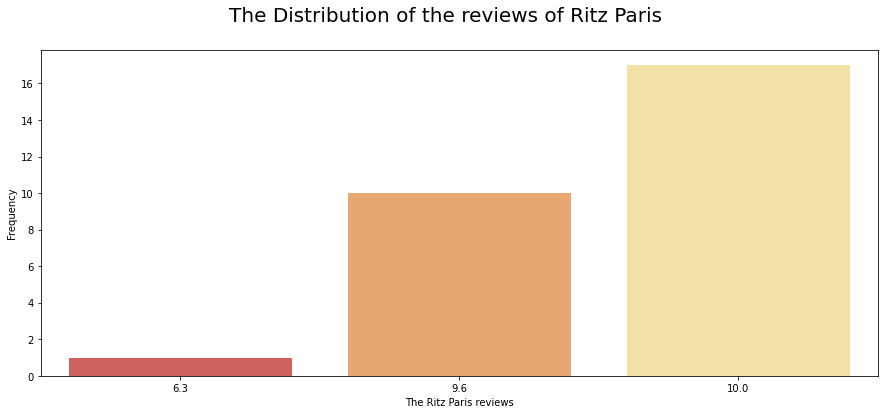

In [41]:
fig, ax = plt.subplots( figsize=(15, 6))
# no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
sns.countplot(data = Ritz_Paris , x = 'Reviewer_Score' , palette=color_sns)

ax.set_xlabel('The Ritz Paris reviews')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of the reviews of Ritz Paris', fontsize = 20)

plt.show()

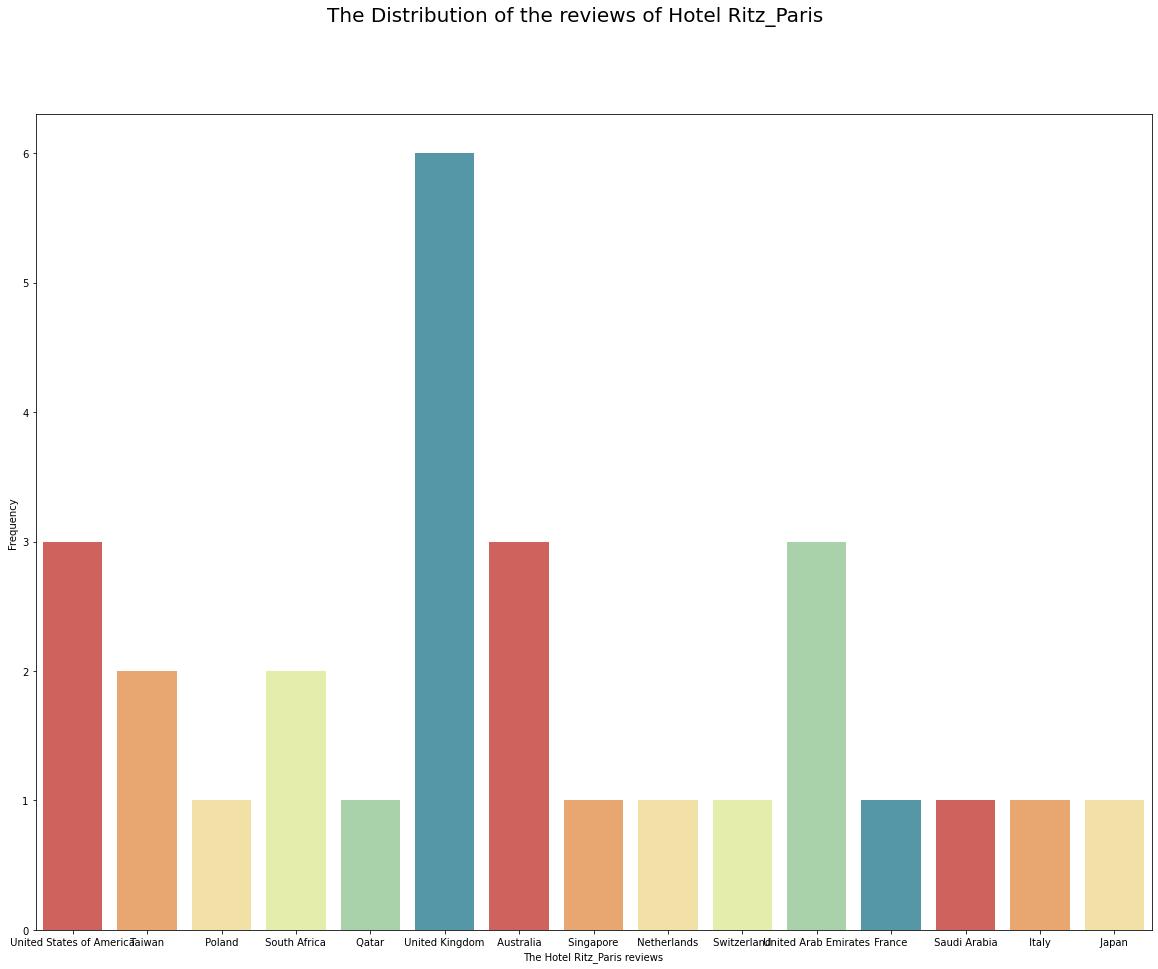

In [46]:
fig, ax = plt.subplots( figsize=(20, 15))
sns.countplot(data = Ritz_Paris , x = 'Reviewer_Nationality', palette=color_sns)

ax.set_xlabel('The Hotel Ritz_Paris reviews')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of the reviews of Hotel Ritz_Paris', fontsize = 20)

plt.show()

In [49]:
Hotel_Positive_Review = " ".join(Positive_Review for Positive_Review in df_Hotel.Positive_Review)

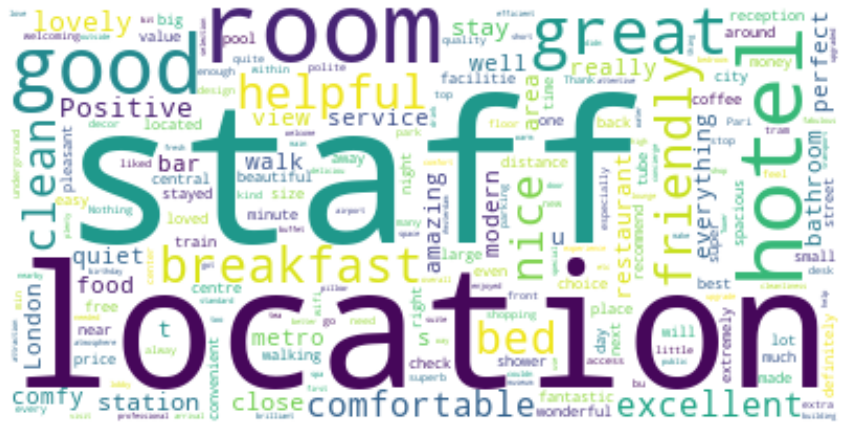

In [50]:
# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(Hotel_Positive_Review)

# Display the generated Word Cloud
fig, ax = plt.subplots(figsize=(15, 10))

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")
plt.show()

In [45]:
Casa_Camper = df_Hotel[df_Hotel['Hotel_Name'] == 'Hotel Casa Camper']

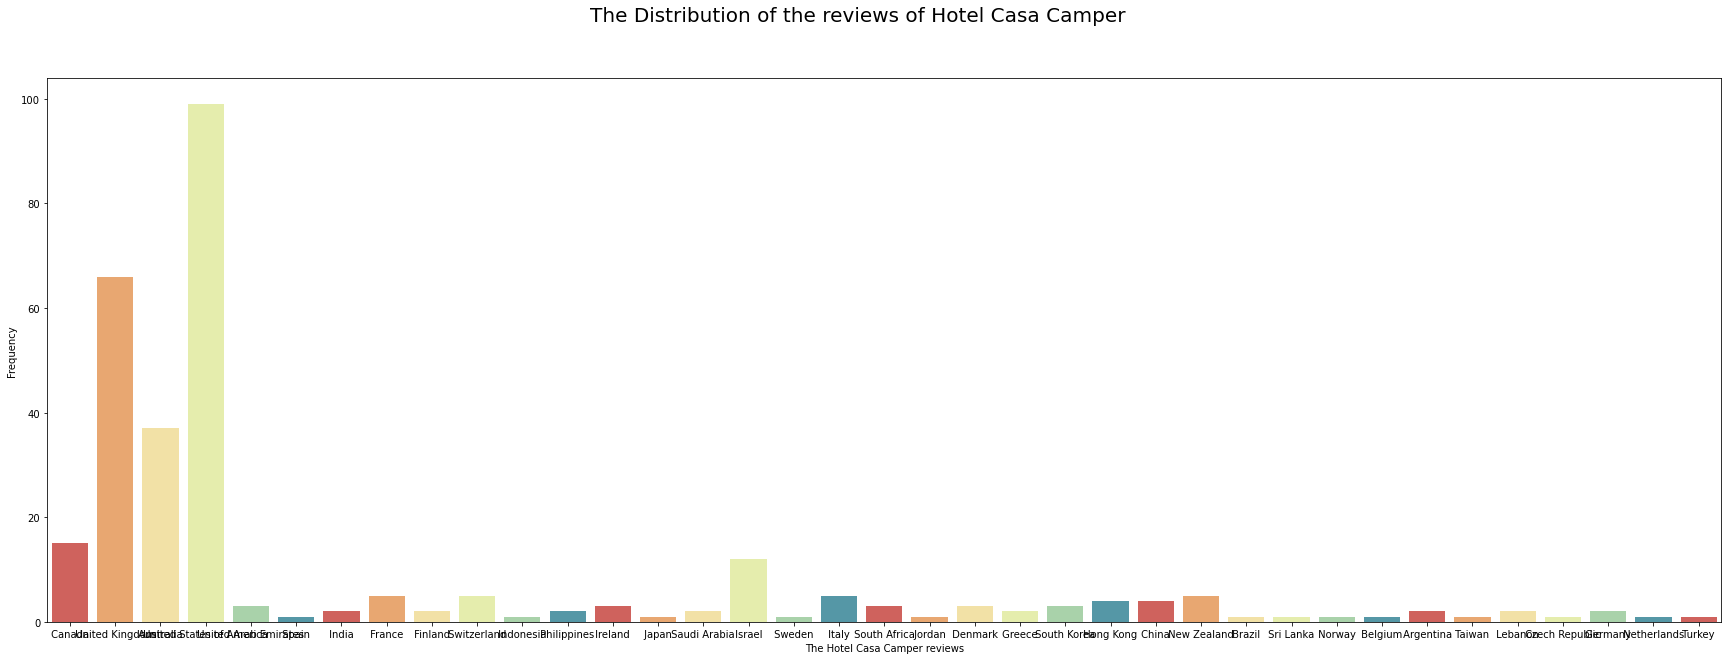

In [82]:
fig, ax = plt.subplots( figsize=(30, 10))
sns.countplot(data = Casa_Camper , x = 'Reviewer_Nationality', palette=color_sns)

ax.set_xlabel('The Hotel Casa Camper reviews')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of the reviews of Hotel Casa Camper', fontsize = 20)

plt.show()

# [Rating of the worst hotels and Why did it get this rating](#Rating_of_the_worst_hotels_and_Why_did_it_get_this_rating)

In [86]:
 Hotel_Liberty = df_Hotel[df_Hotel['Hotel_Name'] == 'Hotel Liberty']

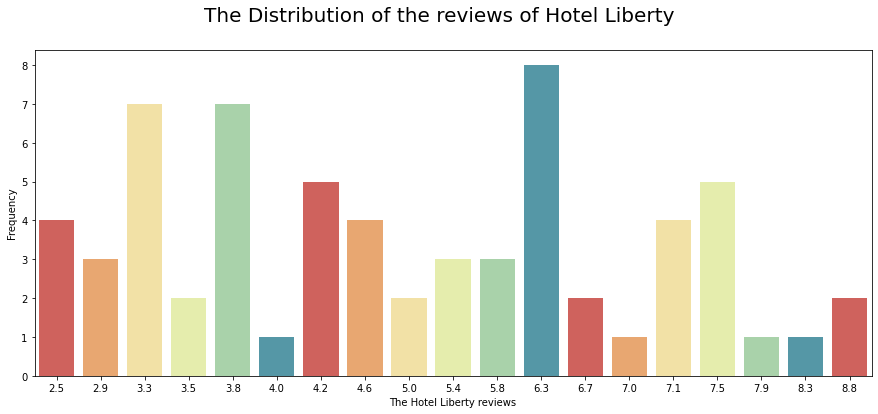

In [87]:
fig, ax = plt.subplots( figsize=(15, 6))
# no_test= df.iloc[0:(df[df['PassengerId'] == test_first_id].index[0]), :]
sns.countplot(data = Hotel_Liberty , x = 'Reviewer_Score', palette=color_sns)

ax.set_xlabel('The Hotel Liberty reviews')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of the reviews of Hotel Liberty', fontsize = 20)

plt.show()

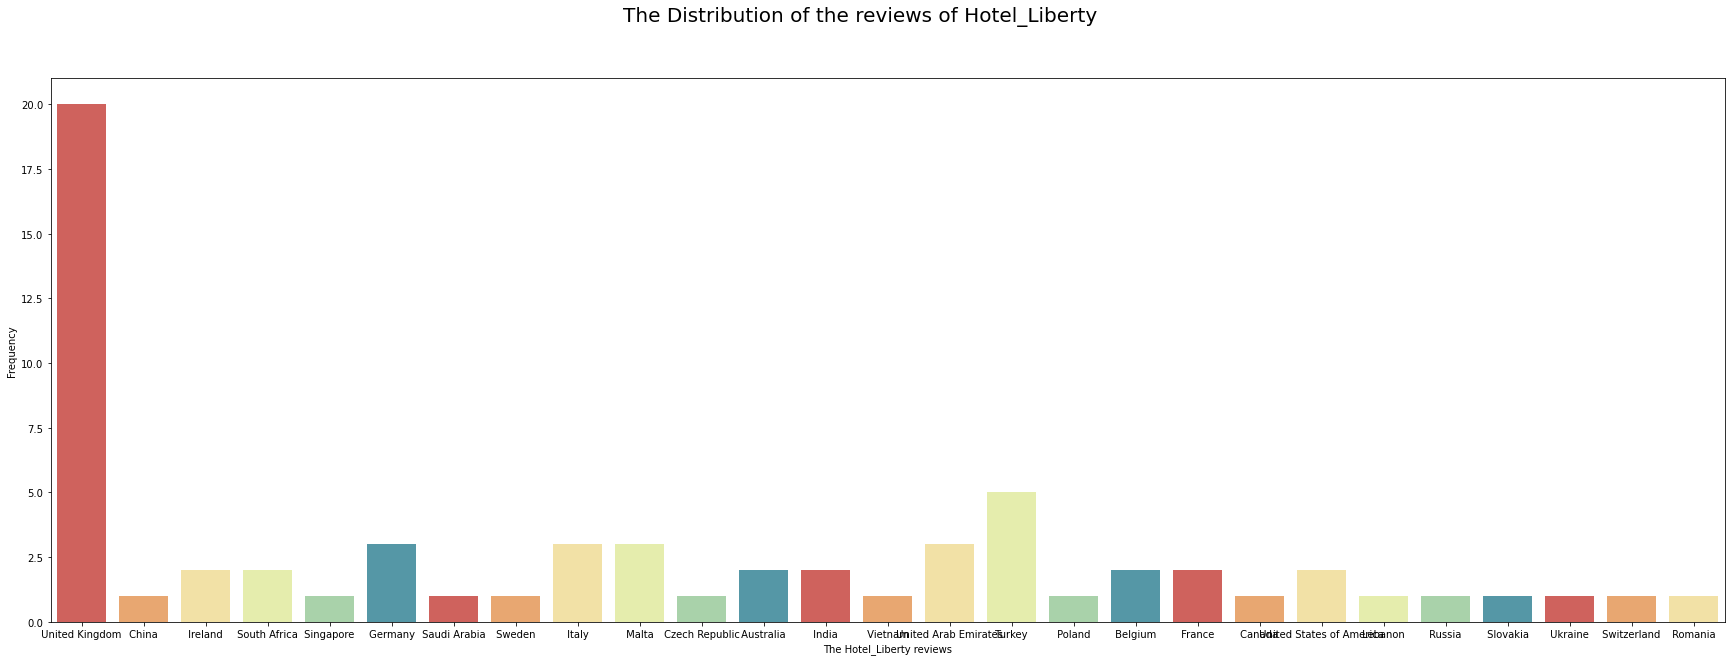

In [88]:
fig, ax = plt.subplots( figsize=(30, 10))
sns.countplot(data = Hotel_Liberty , x = 'Reviewer_Nationality', palette=color_sns)

ax.set_xlabel('The Hotel_Liberty reviews')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of the reviews of Hotel_Liberty', fontsize = 20)

plt.show()

In [89]:
Hotel_Liberty_Negative = " ".join(Negative_Review for Negative_Review in Hotel_Liberty.Negative_Review)

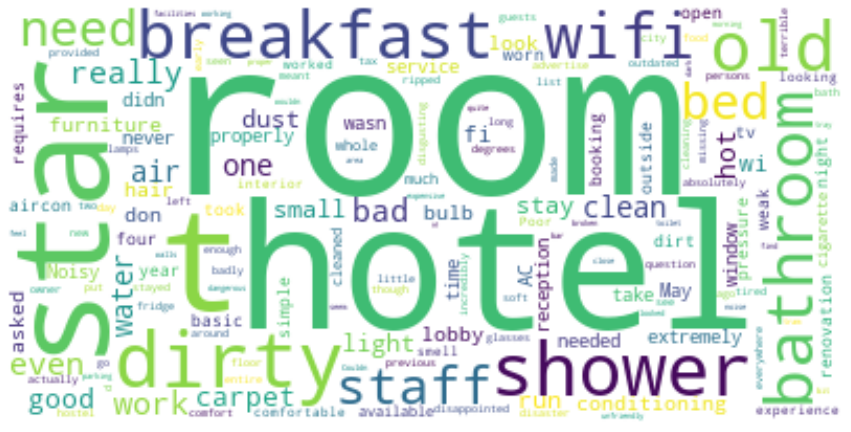

In [90]:
# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(Hotel_Liberty_Negative)

# Display the generated Word Cloud
fig, ax = plt.subplots(figsize=(15, 10))

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")
plt.show()

In [91]:
df_Hotel.groupby('Hotel_Name').mean()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,group_hotel
Hotel_Name,,,,,,,,
11 Cadogan Gardens,101.0,8.7,15.528302,393.0,19.974843,7.226415,8.845283,159.0
1K Hotel,69.0,7.7,24.932432,663.0,15.601351,9.141892,7.861486,148.0
25hours Hotel beim MuseumsQuartier,391.0,8.8,16.161103,4324.0,21.911466,8.722787,8.983309,689.0
41,66.0,9.6,8.883495,244.0,25.300971,6.009709,9.711650,103.0
45 Park Lane Dorchester Collection,27.0,9.4,6.750000,68.0,11.535714,7.214286,9.603571,28.0
...,...,...,...,...,...,...,...,...
citizenM London Bankside,804.0,9.1,13.977587,3802.0,20.856295,9.768622,9.112261,1517.0
citizenM London Shoreditch,500.0,9.1,14.439141,2113.0,21.620525,8.219570,9.092005,838.0
citizenM Tower of London,832.0,9.1,15.623292,4672.0,24.430778,9.334522,9.135591,1683.0


In [92]:
df_Hotel.groupby('Hotel_Name').sum()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,group_hotel
Hotel_Name,,,,,,,,
11 Cadogan Gardens,16059,1383.3,2469,62487,3176,1149,1406.4,25281
1K Hotel,10212,1139.6,3690,98124,2309,1353,1163.5,21904
25hours Hotel beim MuseumsQuartier,269399,6063.2,11135,2979236,15097,6010,6189.5,474721
41,6798,988.8,915,25132,2606,619,1000.3,10609
45 Park Lane Dorchester Collection,756,263.2,189,1904,323,202,268.9,784
...,...,...,...,...,...,...,...,...
citizenM London Bankside,1219668,13804.7,21204,5767634,31639,14819,13823.3,2301289
citizenM London Shoreditch,419000,7625.8,12100,1770694,18118,6888,7619.1,702244
citizenM Tower of London,1400256,15315.3,26294,7862976,41117,15710,15375.2,2832489


In [93]:
df_Hotel.loc[:,['Hotel_Name','Average_Score']]

,Hotel_Name,Average_Score
0,Hotel Arena,7.7
1,Hotel Arena,7.7
2,Hotel Arena,7.7
3,Hotel Arena,7.7
4,Hotel Arena,7.7
...,...,...
515733,Atlantis Hotel Vienna,8.1
515734,Atlantis Hotel Vienna,8.1
515735,Atlantis Hotel Vienna,8.1
515736,Atlantis Hotel Vienna,8.1


In [94]:
df_Hotel.iloc[0:2,:]

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,group_hotel
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,405
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,405


# [Unique value](#Unique_value)

In [95]:
df_Hotel['Hotel_Address'].unique()

array([' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       '1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom',
       '1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom',
       ...,
       'Wilton Place Knightsbridge Westminster Borough London SW1X 7RL United Kingdom',
       'Wrights Lane Kensington and Chelsea London W8 5SP United Kingdom',
       'Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria'],
      dtype=object)

In [96]:
df_Hotel['Additional_Number_of_Scoring'].unique()

array([ 194,  244,  639, 1058,   26,   13,  724, 1322,   60,   75,   99,
        162,   91, 1274,   40,  628,  118,   70,  150,   89,   61,   97,
        704,   68, 1258,   96,   84,   39,   38,   33,  129,   85,   77,
        329,  788,  220,   46,  303,  215,  141,   34,   14,   27,   56,
         18,   83,   15,   42,   43,  255,  728,  176,  541,  404,   94,
        838,  302,  100,   10,  241,  466,  341,   65,  212,  641,  248,
        227,  253,  205,   44,   25,  101,   19,   80,  111,  119,   37,
        421,  178,  123,  134,  105,  229,   23,   41,   81,   78,  139,
        197,  440,   29,   57,   73,  398,   54,   30,  397,  153,   69,
        158,   48,    6,   24,   88,  299,  465,  713,  312,  368,  289,
         11,  143,   52,  127,  528,   53,  189,   31,   59,  317,  687,
        154,   67,    8,  174,  196,   21,   47,   28,  152,   87,  256,
        459, 1471,   32,  512,   86,  204,   90,  300,   58,  114,   50,
        219,  148,  161, 2682,  198,  759,   55,  2

In [138]:
df_Hotel['Review_Date'].unique()

array(['2017-08-03T00:00:00.000000000', '2017-07-31T00:00:00.000000000',
       '2017-07-24T00:00:00.000000000', '2017-07-17T00:00:00.000000000',
       '2017-07-09T00:00:00.000000000', '2017-07-08T00:00:00.000000000',
       '2017-07-07T00:00:00.000000000', '2017-07-06T00:00:00.000000000',
       '2017-07-04T00:00:00.000000000', '2017-07-03T00:00:00.000000000',
       '2017-06-30T00:00:00.000000000', '2017-06-29T00:00:00.000000000',
       '2017-06-20T00:00:00.000000000', '2017-06-19T00:00:00.000000000',
       '2017-06-12T00:00:00.000000000', '2017-06-10T00:00:00.000000000',
       '2017-05-29T00:00:00.000000000', '2017-05-27T00:00:00.000000000',
       '2017-05-25T00:00:00.000000000', '2017-05-22T00:00:00.000000000',
       '2017-05-21T00:00:00.000000000', '2017-05-16T00:00:00.000000000',
       '2017-05-11T00:00:00.000000000', '2017-05-09T00:00:00.000000000',
       '2017-05-02T00:00:00.000000000', '2017-04-27T00:00:00.000000000',
       '2017-04-26T00:00:00.000000000', '2017-04-20

In [139]:
df_Hotel['Average_Score'].unique()

array([7.7, 8.5, 9.2, 8.4, 7.2, 8. , 8.9, 8.2, 7.4, 9.5, 8.1, 8.7, 8.6,
       8.3, 9.6, 9.4, 9.3, 9.1, 7.8, 9. , 7.1, 8.8, 7.9, 7.5, 7.6, 9.8,
       6.8, 7. , 7.3, 6.6, 6.7, 6.9, 6.4, 5.2])

In [140]:
df_Hotel['Hotel_Name'].unique()

array(['Hotel Arena', 'K K Hotel George', 'Apex Temple Court Hotel', ...,
       'The Berkeley', 'Holiday Inn London Kensington',
       'Atlantis Hotel Vienna'], dtype=object)

In [141]:
df_Hotel['Reviewer_Nationality'].unique()

array([' Russia ', ' Ireland ', ' Australia ', ' United Kingdom ',
       ' New Zealand ', ' Poland ', ' Belgium ', ' Norway ', ' France ',
       ' Italy ', ' Canada ', ' Netherlands ', ' Germany ',
       ' United States of America ', ' Hungary ', ' Israel ',
       ' Switzerland ', ' India ', ' United Arab Emirates ', ' Malaysia ',
       ' Denmark ', ' South Africa ', ' Rwanda ', ' Finland ',
       ' Portugal ', ' Luxembourg ', ' Spain ', ' Malta ', ' China ',
       ' Turkey ', ' Ukraine ', ' Gibraltar ', ' Argentina ',
       ' Abkhazia Georgia ', ' Isle of Man ', ' Sweden ', ' Croatia ',
       ' Saudi Arabia ', ' Lithuania ', ' Slovenia ', ' Panama ',
       ' Austria ', ' Brazil ', ' Taiwan ', ' Iceland ', ' Iran ',
       ' Liechtenstein ', ' Chile ', ' Hong Kong ',
       ' United States Minor Outlying Islands ', ' Morocco ', ' Oman ',
       ' Lebanon ', ' Qatar ', ' Nigeria ', ' Romania ',
       ' Czech Republic ', ' Greece ', ' Thailand ', ' Singapore ',
       ' Guerns

In [142]:
df_Hotel['Negative_Review'].unique()

array([' I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to 

In [143]:
df_Hotel['Review_Total_Negative_Word_Counts'].unique()

array([397,   0,  42, 210, 140,  17,  33,  11,  34,  15,   5,  75,  28,
        35,  38,  59,  73,  40,  92, 364,  22,   3,  57,  51,  31,  53,
        24,   7,  61,  68,   4,  26,  23,  18,  29,  93, 122,  63, 139,
       110,  56, 315,  41, 105,  58,  46, 144,  45,  37,  30,  55, 155,
        13,  44,  16,  65,  62, 119,  39, 264,  27, 112,  78,  14,   8,
        52,  21, 108,  60, 126,  49,  89, 180,  25,  19,  36, 195,  54,
        80, 145,  12,  50,  81,   9,  20, 103, 150, 176,  84,  85,  87,
        66,  95, 149,  82, 116,  67,  32,  10,   6,   2,  94,  77,  43,
        70,  48,  72,  71, 207,  96,  69, 152,  88, 392, 134,  86, 107,
       222,  98,  99, 148, 121,  79, 104,  47,  74,  83, 109, 141, 125,
       111, 120,  64, 146, 100,  91, 169,  76, 135, 106, 245, 101, 252,
       220, 185, 218, 138, 311, 102, 114,  97, 211, 354, 174, 133, 136,
       142, 360, 156, 373, 379, 118, 131, 166, 117, 197,  90, 128, 270,
       123, 175, 130, 267, 132, 182, 309, 164, 158, 143, 153, 18

In [144]:
df_Hotel['Total_Number_of_Reviews'].unique()

array([1403, 1831, 2619, ...,  717, 5945, 2823], dtype=int64)

In [145]:
df_Hotel['Positive_Review'].unique()

array([' Only the park outside of the hotel was beautiful ',
       ' No real complaints the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one Bit confusing Secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great Aside from those minor minor things fantastic spot and will be back when i return to Amsterdam ',
       ' Location was good and staff were ok It is cute hotel the breakfast range is nice Will go back ',
       ..., ' Breakfast was ok and we got earlier check in ',
       ' The rooms are enormous and really comfortable I believe that a family of 5 members could be more than comfy in these spaces ',
       ' staf

In [146]:
df_Hotel['Review_Total_Positive_Word_Counts'].unique()

array([ 11, 105,  21,  26,   8,  20,  18,  19,   0,  50, 101,   4,   6,
        59,  15,  82,  14,  64,  33,  48,  17,  75,  37,  51, 130,  43,
       134,  22,  49,  28,  16,  40,  32,  52,  56, 186,  41,  23,   3,
        77,  39,  65,  12,  76,  84,   5,  24,  92,  47,  34,  27,  13,
        68,  60,  10,  25,  30,  81,  97,  38,  29,   2,  87, 115,  78,
         7,  67,  36,  74,   9,  31,  44,  35, 176,  94,  42,  71,  66,
        80,  45, 158, 132, 104,  73,  54, 121,  98, 137, 113,  53, 156,
        55, 133,  62, 100,  69,  46,  57, 131,  61,  79,  63, 164, 175,
        72,  90, 107, 106,  83,  86, 103, 146,  58, 116, 173,  89, 118,
       111, 102, 140, 227,  95, 304,  93,  70,  85,  88, 231, 195, 167,
       269, 181, 138, 110, 373, 144, 180, 281, 108, 163,  91, 272, 135,
       143, 122, 270, 274,  99, 151, 219, 112,  96, 142, 177, 184, 129,
       233, 174, 171, 209, 141, 145, 124, 128, 221, 160, 123, 237, 125,
       139, 235, 341, 172, 185, 120, 243, 166, 147, 114, 109, 19

In [147]:
df_Hotel['Total_Number_of_Reviews_Reviewer_Has_Given'].unique()

array([  7,   9,   1,   3,   6,   2,  12,  26,   8,   4,  16,  21,  25,
         5,  14,  85,  11,  34,  27,  10,  28,  17,  19,  29,  13,  15,
        62,  43,  24,  68,  22,  82,  23,  18,  46,  33,  40,  20,  41,
        30,  37,  66,  48,  61,  59,  42,  69,  56,  35,  32,  80,  54,
        36,  83,  31,  55,  49,  47,  53,  51,  71,  67,  50,  65,  38,
        52,  45,  90,  86,  39,  58,  44,  60, 158, 144, 107, 106,  99,
        79,  77,  73,  57, 166,  78,  88,  70,  84,  76,  94,  98,  81,
       132,  64, 115,  89, 100, 108,  63, 123, 173,  93, 224,  75,  97,
       131, 103,  96, 156, 184, 315, 121,  72, 116, 111, 297,  92, 112,
       110, 134, 146, 140, 125, 139, 149, 102, 151, 171, 105,  74,  95,
       138,  91, 129, 228, 159, 122, 109, 119, 124, 117, 161, 167,  87,
       113, 172, 114, 239, 176, 281, 162, 160, 147, 137, 127, 181, 152,
       130, 101, 143, 164, 250, 186, 191, 199, 126, 211, 330, 165, 104,
       120, 145, 157, 223, 135, 270, 148, 118, 142, 232, 136, 17

In [148]:
df_Hotel['Reviewer_Score'].unique()

array([ 2.9,  7.5,  7.1,  3.8,  6.7,  4.6, 10. ,  6.5,  7.9,  5.8,  9.2,
        8.8,  6.3,  5.4,  9.6,  8.3,  4.2,  3.3,  5. ,  2.5,  3.1,  6. ,
        5.5,  9.5,  8. ,  8.5,  9. ,  4.5,  7. ,  5.6,  8.1,  6.9,  9.4,
        3. ,  4. ,  3.5,  4.4])

In [149]:
df_Hotel['Tags'].unique()

array(["[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']",
       "[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 4 nights ']",
       "[' Leisure trip ', ' Family with young children ', ' Duplex Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']",
       ...,
       "[' Leisure trip ', ' Solo traveler ', ' Superior Double Room with Garden View ', ' Stayed 1 night ', ' Submitted from a mobile device ']",
       "[' Business trip ', ' Solo traveler ', ' Superior Double Room with Garden View ', ' Stayed 2 nights ']",
       "[' Leisure trip ', ' Family with young children ', ' Standard Double or Twin Room ', ' Stayed 10 nights ']"],
      dtype=object)

In [150]:
df_Hotel['days_since_review'].unique()

array(['0 days', '3 days', '10 days', '17 days', '25 days', '26 days',
       '27 days', '28 days', '30 days', '31 days', '34 days', '35 days',
       '44 days', '45 days', '52 days', '54 days', '66 days', '68 days',
       '70 days', '73 days', '74 days', '79 days', '84 days', '86 days',
       '93 days', '98 days', '99 days', '105 day', '106 day', '107 day',
       '109 day', '111 day', '115 day', '120 day', '127 day', '134 day',
       '136 day', '137 day', '138 day', '140 day', '150 day', '164 day',
       '167 day', '170 day', '175 day', '178 day', '186 day', '188 day',
       '190 day', '196 day', '207 day', '217 day', '218 day', '225 day',
       '226 day', '227 day', '231 day', '232 day', '233 day', '234 day',
       '235 day', '236 day', '239 day', '261 day', '269 day', '270 day',
       '274 day', '276 day', '277 day', '281 day', '282 day', '283 day',
       '294 day', '295 day', '296 day', '301 day', '303 day', '310 day',
       '318 day', '319 day', '325 day', '328 day', '3

In [151]:
Reviewer_Nationality = " ".join(Reviewer_Nationality for Reviewer_Nationality in df_Hotel.Reviewer_Nationality)

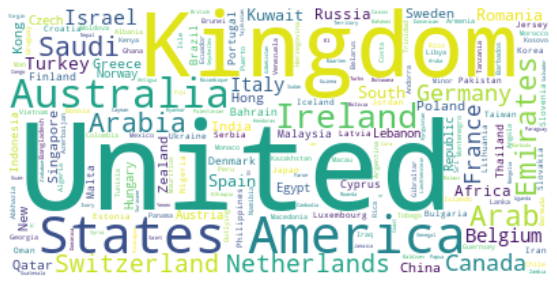

In [152]:
# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(Reviewer_Nationality)

# Display the generated Word Cloud
fig, ax = plt.subplots(figsize=(10, 5))

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")
plt.show()

# [Drop the Duplicated Rows](#Drop_the_Duplicated_Rows)

In [33]:
sum(df_Hotel.duplicated())

526

In [34]:
df_Hotel.drop_duplicates(inplace = True)
#aftrr removing duplicate value from the datasetx
print("After Removing Duplicate Values (Rows,Columns) : ",df_Hotel.shape)

After Removing Duplicate Values (Rows,Columns) :  (515212, 15)


In [35]:
sum(df_Hotel.duplicated())

0

In [36]:
df_Hotel.shape

(515212, 15)